In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [59]:
pwd

'C:\\Users\\victo\\Documents\\git_projects\\jupyter_books\\DataScience\\Machine_Learning'

In [3]:
msgs = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(msgs))

5574


In [5]:
for num, message in enumerate(msgs[:10]):
    print(num, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [3]:
import pandas as pd

In [4]:
msg = pd.read_csv('SMSSpamCollection', sep='\t', names=['labels', 'message'])

In [5]:
msg.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
msg.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [8]:
msg.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [9]:
 msg['length'] = msg['message'].apply(len)

In [10]:
msg.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

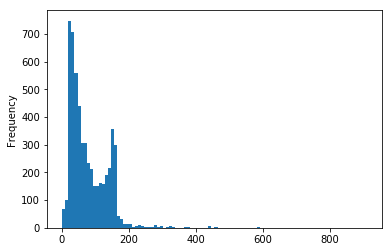

In [12]:
msg['length'].plot(bins=100, kind='hist')

In [13]:
msg['length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
msg[msg['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000198CC5C05C0>,
      dtype=object)

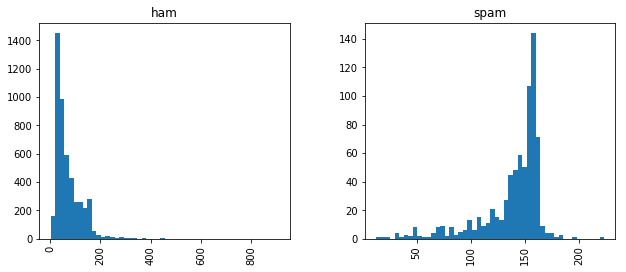

In [15]:
msg.hist(column='length', by='labels', bins=50, figsize=(10,4))

In [16]:
msg.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
msg[msg['length']>900].index

Int64Index([1085], dtype='int64')

In [18]:
msg2 = msg.drop(index=msg[msg['length']>250].index)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000198D27445C0>,
      dtype=object)

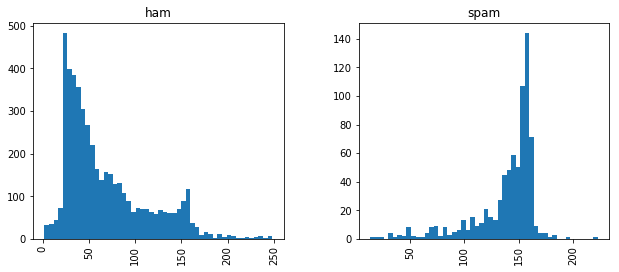

In [19]:
msg2.hist(column='length', by='labels', bins=50, figsize=(10,4))

In [20]:
# transform message into a vector
import string

In [21]:
# turn a string into a list(vector) of numbers
mess = 'Sample message! Notice: it has punctuation.'
nopunc = [char for char in  mess if char not in string.punctuation]

In [22]:
nopunc = "".join(nopunc)

In [23]:
nopunc

'Sample message Notice it has punctuation'

In [24]:
# remove stop words, they don't give much info about spam and ham

In [25]:
from nltk.corpus import stopwords

In [26]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [47]:
def text_process(mess):
    '''Takes a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text '''
    
    # Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join everything again to form a string
    nopunc = "".join(nopunc)
    # Remove all stopwords
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # Return the list
    return nopunc

In [48]:
print(text_process(mess))

['Sample', 'message', 'Notice', 'punctuation']


In [50]:
# Tokenize the strings for testing this text_process function
# Tokenization is the term used to describe the process
# of converting normal text strings into a list of tokens
print(text_process(msg.iloc[0]['message']))

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']


In [51]:
# Continue normalizing the text
# Can add STEMMNING or distinguishing where part of speech 
# There's a book with nltk documentation

In [53]:
# Vectorization
# convert messages to vector that machine understand
# sparse matrix

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [72]:
# giving the algo all the messages
bow_transformer.fit(msg['message'])

CountVectorizer(analyzer=<function text_process at 0x00000198D2BCB950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [57]:
msg4 = msg['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [60]:
bow4 = bow_transformer.transform([msg4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [63]:
print(bow_transformer.get_feature_names()[4068])

U


In [64]:
msg_bow = bow_transformer.transform(msg['message']) 

In [66]:
print('shape of the matrix', msg_bow.shape)
print('amount of non-zero occurunces: ', msg_bow.nnz)
print('sparsity: ', round((100*msg_bow.nnz)/(msg_bow.shape[0] * msg_bow.shape[1]),2))

shape of the matrix (5572, 11425)
amount of non-zero occurunces:  50548
sparsity:  0.08


##### Term frequency and Inverse doc frequency
way of weighing the statistical measure and it's used to evaluate how important a word is to a document in a collection or corpus.

Term freq: which measures how frequentlyy a term occurs in a document. Since every document is different length, it is possible that a term would appear mych more time in long documents than shorter onw. Thus, the term frequency is often divided by the document length (aka, the total number of term in the document) aas a way of normalization.

TF(t) = (number od times term t appears in a document)/ (total number of terms in the document)

for comparing text messages, for examples.

Inverse Doc Freq: which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that a certain terms, such as 'is', 'of', and 'that', may appear a lot of times but have little importance. Thus we need to wigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(total number of documents / number of documents with the term t in it)


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(msg_bow) 

In [69]:
tfidf4 = tfidf_transformer.transform(bow4)

In [70]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [71]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [73]:
# doing the entire bag of words, all the messages
msg_tfidf = tfidf_transformer.transform(msg_bow)

In [75]:
print(msg_tfidf.shape)

(5572, 11425)


In [76]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
spam_model = MultinomialNB().fit(msg_tfidf, msg['labels'])

In [79]:
print('Predicted: ', spam_model.predict(tfidf4)[0])
print('Expected: ', msg['labels'][3])

Predicted:  ham
Expected:  ham


In [80]:
## doing all predictions
all_predictions = spam_model.predict(msg_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [81]:
from sklearn.metrics import classification_report
print(classification_report(msg['labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [83]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split\
        (msg['message'], msg['labels'], test_size=0.2)

In [84]:
print(len(msg_train), len(msg_test), len(msg_train)+len(msg_test))

4457 1115 5572


In [85]:
# using sklearn pipeline
from sklearn.pipeline import Pipeline

In [86]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

In [88]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000198D2BCB950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [89]:
prediction = pipeline.predict(msg_test)

In [91]:
print(classification_report(prediction, label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1012
       spam       0.73      1.00      0.84       103

avg / total       0.97      0.97      0.97      1115

